# Scraping the Data form the Web 

In [1]:
import requests # open-librarie for web scarping 
from bs4 import BeautifulSoup # to extract the data
import pandas as pd # Insert data files and clean data  
import numpy as np # for Numerical calculation
import seaborn as sb # for make charts and graphs
import matplotlib.pyplot as plt # for make charts and graphs

In [2]:
!pip install seaborn

In [12]:
df = pd.read_csv('all_products.csv')

In [13]:
df

,Product Name,Price,Category,Ratings,Number of Reviews,Price Ratings(high/low)
0,Packard 255 G2,416.99,Laptops,0,2,low
1,Aspire E1-510,306.99,Laptops,0,2,low
2,ThinkPad T540p,1178.99,Laptops,0,2,high
3,ProBook,739.99,Laptops,0,8,low
4,ThinkPad X240,1311.99,Laptops,0,12,high
...,...,...,...,...,...,...
91,Sony Xperia,118.99,Phones,0,6,low
92,Ubuntu Edge,499.99,Phones,0,2,low
93,Iphone,899.99,Phones,0,10,low
94,Iphone,899.99,Phones,0,8,low


# EDA Process(Exploratory Data Analysis): 

In [8]:
df.shape

(96, 6)

In [9]:
df.size

576

In [67]:
df.describe()

,Price,Ratings,Number of Reviews,Price Ratings,groups
count,96.000000,96.0,96.000000,96.000000,96.000000
mean,549.281250,0.0,7.000000,0.291667,0.812500
std,395.421473,0.0,4.106478,0.456916,0.729996
min,25.000000,0.0,0.000000,0.000000,0.000000
25%,317.500000,0.0,3.000000,0.000000,0.000000
50%,456.000000,0.0,7.000000,0.000000,1.000000
75%,691.500000,0.0,10.000000,1.000000,1.000000
max,1799.000000,0.0,14.000000,1.000000,2.000000


In [13]:
df.isnull()

,Product Name,Price,Category,Ratings,Number of Reviews,Price Ratings(high/low)
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
91,False,False,False,False,False,False
92,False,False,False,False,False,False
93,False,False,False,False,False,False
94,False,False,False,False,False,False


In [14]:
df.head()

,Product Name,Price,Category,Ratings,Number of Reviews,Price Ratings(high/low)
0,Packard 255 G2,416.99,Laptops,0,2,low
1,Aspire E1-510,306.99,Laptops,0,2,low
2,ThinkPad T540p,1178.99,Laptops,0,2,high
3,ProBook,739.99,Laptops,0,8,low
4,ThinkPad X240,1311.99,Laptops,0,12,high


In [15]:
df.tail()

,Product Name,Price,Category,Ratings,Number of Reviews,Price Ratings(high/low)
91,Sony Xperia,118.99,Phones,0,6,low
92,Ubuntu Edge,499.99,Phones,0,2,low
93,Iphone,899.99,Phones,0,10,low
94,Iphone,899.99,Phones,0,8,low
95,Iphone,899.99,Phones,0,1,low


In [12]:
df.dtypes.to_frame()

,0
Product Name,object
Price,float64
Category,object
Ratings,int64
Number of Reviews,int64
Price Ratings(high/low),object


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Product Name             96 non-null     object
 1   Price                    96 non-null     int32 
 2   Category                 96 non-null     object
 3   Ratings                  96 non-null     int64 
 4   Number of Reviews        96 non-null     int64 
 5   Price Ratings(high/low)  96 non-null     object
 6   Price Ratings            96 non-null     int64 
 7   groups                   96 non-null     int32 
dtypes: int32(2), int64(3), object(3)
memory usage: 5.4+ KB


In [18]:
#total price by category :

df.groupby('Category')['Price'].sum().to_frame()

,Price
Category,
Laptops,44252.47
Phones,3605.91
Tablets,4872.79


In [19]:
# average price by category :

df.groupby('Category')['Price'].mean().to_frame() 

,Price
Category,
Laptops,670.491970
Phones,400.656667
Tablets,232.037619


In [8]:
# top 10 products with highest price :

df.groupby('Product Name')['Price'].sum().sort_values(ascending = False).head(10).to_frame()

,Price
Product Name,
Asus ROG Strix...,5337.00
Asus VivoBook...,2703.20
Iphone,2699.97
Acer Aspire ES...,2636.32
Lenovo Legion...,2548.00
Lenovo ThinkPa...,2499.25
Acer Aspire 3...,2498.04
ThinkPad Yoga,2257.98
Lenovo V110-15...,2008.74


In [6]:
# bottom 10 products with low price :

df.groupby('Product Name')['Price'].sum().sort_values(ascending = True).head(10).to_frame()

,Price
Product Name,
Nokia 123,24.99
LG Optimus,57.99
Lenovo IdeaTab,69.99
IdeaTab A3500L,88.99
Samsung Galaxy,93.99
Acer Iconia,96.99
Iconia B1-730H...,99.99
Memo Pad HD 7,101.99
Asus MeMO Pad,102.99


In [7]:
#top products by category based on the price hike :

top_products = df.sort_values('Price',ascending = False).groupby('Category').head(1)
top_products

,Product Name,Price,Category,Ratings,Number of Reviews,Price Ratings(high/low)
28,Asus ROG Strix...,1799.00,Laptops,0,8,high
93,Iphone,899.99,Phones,0,10,low
86,Apple iPad Air,603.99,Tablets,0,7,low


In [8]:
#top 5 products by category based on the price hike :

top_products = df.sort_values('Price',ascending = False).groupby('Category').head(5)
top_products 

,Product Name,Price,Category,Ratings,Number of Reviews,Price Ratings(high/low)
28,Asus ROG Strix...,1799.00,Laptops,0,8,high
27,Asus ROG Strix...,1769.00,Laptops,0,8,high
26,Asus ROG Strix...,1769.00,Laptops,0,7,high
25,Lenovo Legion...,1399.00,Laptops,0,8,high
4,ThinkPad X240,1311.99,Laptops,0,12,high
93,Iphone,899.99,Phones,0,10,low
95,Iphone,899.99,Phones,0,1,low
94,Iphone,899.99,Phones,0,8,low
86,Apple iPad Air,603.99,Tablets,0,7,low
80,Galaxy Note 10...,587.99,Tablets,0,6,low


In [9]:
# adding a column that mentions the price is high or low: - greater than 1000 high rest low :

df['Price Ratings(high/low)'] = df['Price'].apply(lambda i : 'high' if  i > 1000 else 'low')

In [ ]:
df

In [10]:
# count of products of high and low :

df.groupby('Price Ratings(high/low)')['Price Ratings(high/low)'].value_counts().to_frame()

,count
Price Ratings(high/low),
high,14
low,82


In [11]:
#  highest reviews for the products 

df.groupby('Product Name')['Number of Reviews'].sum().sort_values(ascending = False).head().to_frame()

,Number of Reviews
Product Name,
Acer Aspire ES...,45
Lenovo ThinkPa...,37
Acer Aspire 3...,34
Lenovo V110-15...,29
Asus VivoBook...,28


In [12]:
# count of categorical products .. 

df.groupby('Category')['Category'].value_counts().to_frame()

,count
Category,
Laptops,66
Phones,9
Tablets,21


In [29]:
# percentage contibution of all the categories :

percentage_distribution = df['Category'].value_counts(normalize=True) * 100

print(round(percentage_distribution),0)


Category
Laptops    69.0
Tablets    22.0
Phones      9.0
Name: proportion, dtype: float64 0


In [78]:
df['Price'] = df['Price'].round(2).astype(float)  

In [14]:
df['Price Ratings'] = df['Price'].apply(lambda i : 1 if i > 600 else 0)

In [15]:
df

,Product Name,Price,Category,Ratings,Number of Reviews,Price Ratings(high/low),Price Ratings
0,Packard 255 G2,416.99,Laptops,0,2,low,0
1,Aspire E1-510,306.99,Laptops,0,2,low,0
2,ThinkPad T540p,1178.99,Laptops,0,2,high,1
3,ProBook,739.99,Laptops,0,8,low,1
4,ThinkPad X240,1311.99,Laptops,0,12,high,1
...,...,...,...,...,...,...,...
91,Sony Xperia,118.99,Phones,0,6,low,0
92,Ubuntu Edge,499.99,Phones,0,2,low,0
93,Iphone,899.99,Phones,0,10,low,1
94,Iphone,899.99,Phones,0,8,low,1


# Unsupervised Learning (Unlabled Data for find pattern):

In [16]:
# Import StandardScaler for standardizing features (mean=0, variance=1)  
from sklearn.preprocessing import StandardScaler  

# Import KMeans clustering algorithm for unsupervised learning  
from sklearn.cluster import KMeans  

# Import filterwarnings to suppress unnecessary warning messages  
from warnings import filterwarnings  


In [ ]:
# Select features
X = df[['Price', 'Number of Reviews']]

# Create scaler
scaler = StandardScaler()

# Fit & transform features
x_scaled = scaler.fit_transform(X)


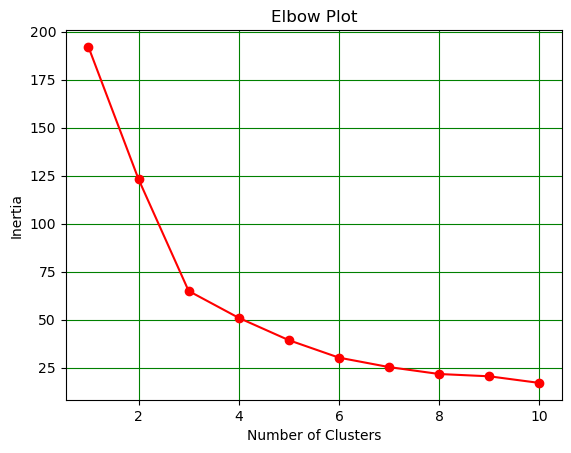

In [72]:
filterwarnings('ignore')  # Ignore warnings

inertia = []  # List to store inertia values

# Loop over cluster counts from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)  # Create KMeans model
    kmeans.fit(x_scaled)  # Fit model
    inertia.append(kmeans.inertia_)  # Store inertia

# Plot the Elbow Curve
plt.plot(range(1, 11), inertia, marker='o', color='r')  # Line plot
plt.title('Elbow Plot')  # Plot title
plt.xlabel('Number of Clusters')  # X-axis label
plt.ylabel('Inertia')  # Y-axis label
plt.grid(color='g')  # Grid color
plt.show()  # Display plot


In [73]:
kmeans = KMeans(n_clusters = 3, random_state = 34)
df['groups'] = kmeans.fit_predict(x_scaled)

In [74]:
df

,Product Name,Price,Category,Ratings,Number of Reviews,Price Ratings(high/low),Price Ratings,groups
0,Packard 255 G2,416.99,Laptops,0,2,low,0,1
1,Aspire E1-510,306.99,Laptops,0,2,low,0,1
2,ThinkPad T540p,1178.99,Laptops,0,2,high,1,0
3,ProBook,739.99,Laptops,0,8,low,1,2
4,ThinkPad X240,1311.99,Laptops,0,12,high,1,0
...,...,...,...,...,...,...,...,...
91,Sony Xperia,118.99,Phones,0,6,low,0,1
92,Ubuntu Edge,499.99,Phones,0,2,low,0,1
93,Iphone,899.99,Phones,0,10,low,1,0
94,Iphone,899.99,Phones,0,8,low,1,0


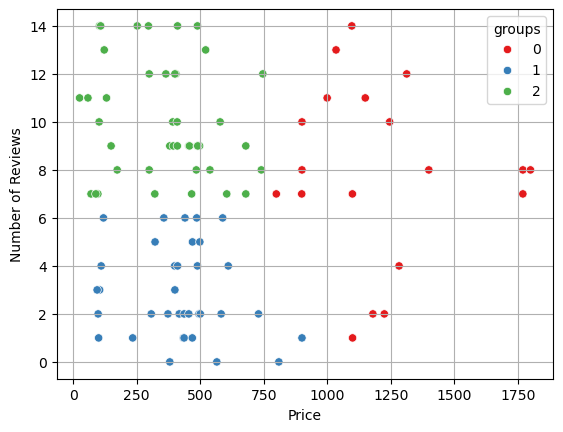

In [75]:
# a scatter plot on price vs number of reviews:

sb.scatterplot(x = X['Price'], y = X['Number of Reviews'],palette = 'Set1',

hue = df['groups'])
            
plt.grid()  # 0 = laptops , 1 = phones , 2 = tablets.

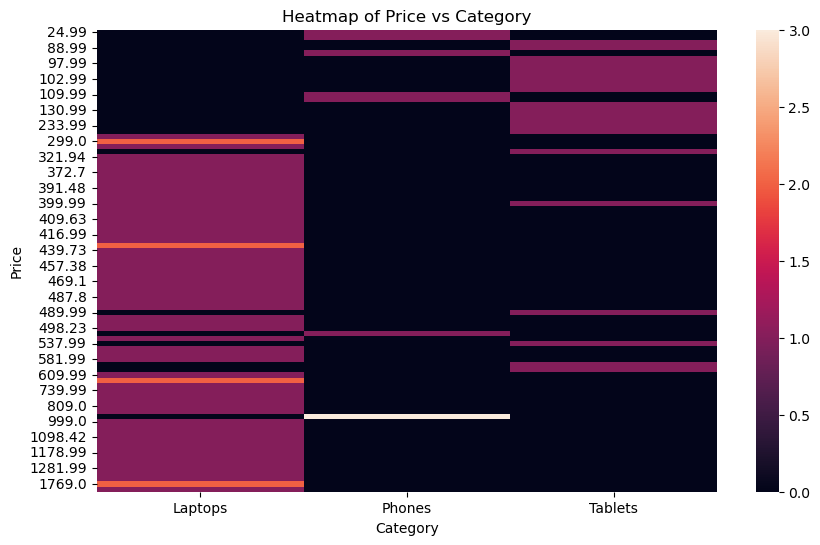

In [76]:
# a correlation heatmap for price vs category

plt.figure(figsize=(10, 6))
sb.heatmap(pd.crosstab(df['Price'], df['Category']))
plt.title("Heatmap of Price vs Category")
plt.xlabel("Category")
plt.ylabel("Price")
plt.show()

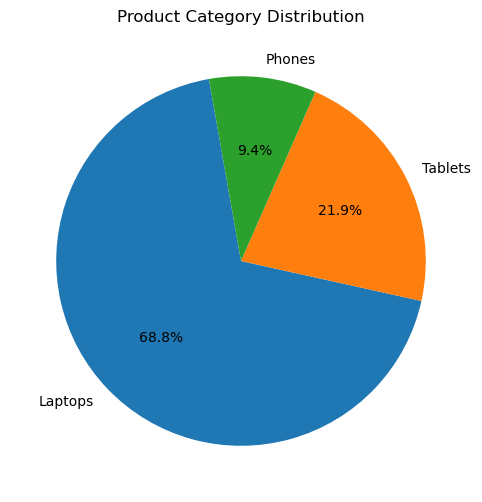

In [77]:
# Count products per category:

category_counts = df['Category'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=100)
plt.title('Product Category Distribution')
plt.show()

# Supervised Learning (Labled Data for Prediction) :

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [121]:


# Features and Target
features = ['Number of Reviews']
target = ['groups']

x = df[features]
y = df[target]

# Scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.2)

# Define regression models
models = {
    'Logistic': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Support Vecot Machines' : SVC(),
    'XG-Boost Classifier' : XGBClassifier()
   
}

model_accuracies = {} 

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    model_accuracies[name] = acc
    print(f'{name} Algorithum: { acc *100:2f} %')

Logistic Algorithum: 85.000000 %
Random Forest Algorithum: 60.000000 %
K-Nearest Neighbors Algorithum: 65.000000 %
Support Vecot Machines Algorithum: 85.000000 %
XG-Boost Classifier Algorithum: 60.000000 %


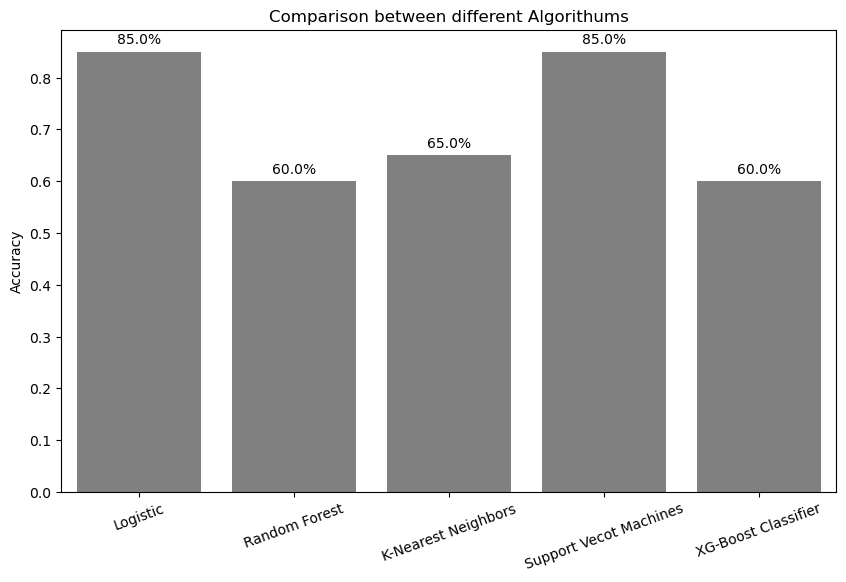

In [123]:
plt.figure(figsize=(10, 6))
bars = sb.barplot(x = list(model_accuracies.keys()),
           y = list(model_accuracies.values()), color = 'gray')
plt.xticks(rotation = 20)
plt.ylabel('Accuracy')
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2,
             height + 0.01,
             f'{height * 100 }%',  # Show as percentage
             ha='center', va='bottom', fontsize=10)

plt.title('Comparison between different Algorithums')
plt.show()

#  Hyper parameter tuning : 

In [104]:
from sklearn.metrics import confusion_matrix

In [105]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[0, 0, 3],
       [0, 5, 0],
       [3, 0, 9]], dtype=int64)

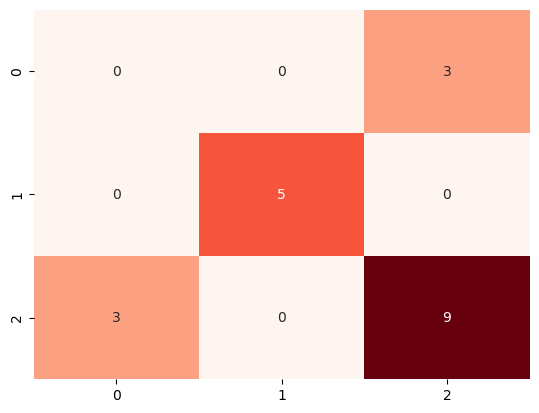

In [106]:
sb.heatmap(cm, annot = True, cbar = False, cmap = 'Reds')
plt.show()

In [107]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [119]:
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5, 10]
}

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1)

# Fit on training data
grid_search.fit(x_train, y_train.values.ravel())

# Best parameters
print("Best Parameters:", grid_search.best_params_)


# Predict and evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Random Forest Accuracy: {acc * 100:.2f}%")

Best Parameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}
Best Random Forest Accuracy: 65.00%


In [120]:
rf = SVC(random_state=42)

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']
}
model = SVC()

# Grid Search with 5-fold cross-validation

# Fit on training data
grid_search.fit(x_train, y_train.values.ravel())

# Best parameters
print("Best Parameters:", grid_search.best_params_)


# Predict and evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Support Vecot Machines Accuracy: {acc * 100:.2f}%")

Best Parameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}
Best Support Vecot Machines Accuracy: 65.00%


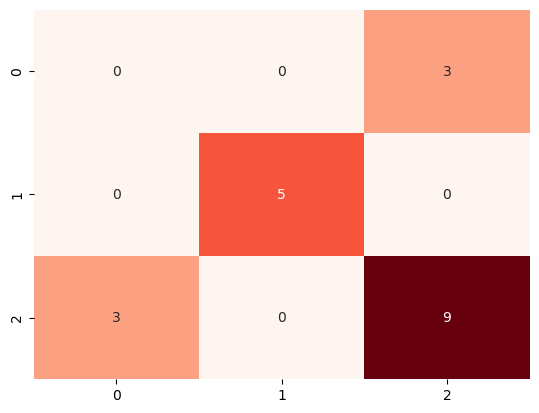

In [110]:
cm = confusion_matrix(y_test, y_pred)
sb.heatmap(cm, annot = True, cbar = False, cmap = 'Reds')
plt.show()

In [42]:
df.columns

Index(['Product Name', 'Price', 'Category', 'Ratings', 'Number of Reviews',
       'Price Ratings(high/low)', 'Price Ratings'],
      dtype='object')